# Implementing MLPs with Keras
**Keras** is a Python package for architecting artificial neural networks. It's considered 'high-level' in that is abstracts away a lot of the detailed model building blocks in favor of logical defaults. Although **TensorFlow** receives most of the attention in neural network training and development, Keras uses the TensorFlow for its backend computation anyway. Thus, it's easy to avoid the somewhat substantial learning curve associated with TensorFlow and get to building models right away.

Also keep in mind that although deep learning tends to receive much attention in the media, in the real-world many far-simpler machine learning algorithms can address most problems and still achieve superior business outcomes. Always strive for building models under the approach of *parsimony*!

## Image Classifier Using the Keras Sequential API
Image classification is one of the hallmark problems deep learning excels at solving. Given an image, can a computer be trained to classify it correctly as a 'dog' or 'cat' or whatever it's an image of? Images are considered **unstructured data** in their raw form -- you can't easily store them in a table format without first performing **feature extraction** and data transformations. 

Once performed, a single image can generate a substantial amount of data. For example, a color image 200x200 pixels can be encoded numerically using its Red/Green/Blue (RGB) channels. Each channel ranges in value from 0 (low intensity) to 255 (high intensity) for its given color. This creates an array (or, in deep learning parlance, a **tensor**) of numeric values 200x200x3 or *120,000* for a single image. Deep learning training sets are necessarily large as the algorithms need lots of data to perform well.

This first example uses the Fashion MNIST data set which is a collection of 70,000 grayscale images of 10 clothing types, each 28x28 pixels. Conveniently, the data set is included in Keras.

## Q: What would the dimensions of a tensor for a black and white image be (remember, a black and white image's pixels can only take one of two numeric values -- '0' for black, '1' for white)?
## A: [TYPE ANSWER HERE]

In [0]:
# Import Fashion MNIST data set
from keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print('Training size:', X_train_full.shape, 'Testing size:', X_test.shape)

The training set contains 60,000 grayscale images, while the testing set contains 10,000. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split between a training set and a test set, but it can be useful to split the training set further to have a validation set. Let's split the full training set into a validation set and a (smaller) training set. 

ANNs also perform best when inputs have been **scaled** using either **Standardization** (where input values are scaled to have a mean of 0 and a standard deviation of 1 giving them a normal/bell curve distribution) or **Normalization** (sometimes called **Min-Max Scaling** where input values are scaled to fall within the range of 0-1). Scaling is a machine learing data preprocessing step that's very important when data is measured using different scales. It essentially "levels the playing field" and treats all input data the same rather than favoring inputs with larger ranges of values which can skew estimations.

Here, scale the pixel intensities down to the 0-1 range (normalization) and convert them to the `float32` data type by dividing by `255.` (by adding the '.' after '255', Python knows to convert the result to `float32`).

In [0]:
# Create validation data of 5000 images
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

# Class names stored in the same order as their numeric labels in `y_train`
class_names = ['T-shirt/top', 
               'Trouser', 
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal', 
               'Shirt', 
               'Sneaker', 
               'Bag', 
               'Ankle boot']

# Example lable for first image in `y_train`
class_names[y_train[0]]

To get an idea of the data set, an array of the first 40 images is shown below:

In [0]:
# Import visualization package
import matplotlib.pyplot as plt

# Visualize an array of training images
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

### Model Architecture
Building ANNs in Keras requires:
1. Designing the structure of each layer in the network
2. Setting training **hyperparameters** like what **cost function** will be used, how the weights/biases will be optimized, and performance metrics
3. Training and evaluating the ANN using the `.fit()` and `.evaluate()` methods
4. Making predictions with the `.predict()` method

This four-step process is the same regardless of whether an ANN is used for regression or classification problems. The Keras Sequential API is initialized by first creating a `model` object that will store the design and training parameters. Then, each layer is added with its own specific hyperparameters. Keras supports both the `.add()` method for adding layers to the `model` object or by creating a list object (both shown below):

In [1]:
# Import keras functions
from keras.models import Sequential
from keras.layers import Flatten, Dense, InputLayer
import warnings

# Supress benign warning messages
warnings.filterwarnings('ignore')

# Design the structure of each layer in the network
model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Alternative method
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# Show summary of model structure
model.summary()

Using TensorFlow backend.
W0829 17:39:43.994366 139630724040576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 17:39:44.040709 139630724040576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 17:39:44.069070 139630724040576 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In the code above: 
* **Line 2**: Creates the model using the Sequential API. 
* **Line 3**: Performs a **flattening** transformation which reshapes the 28x28 image data into a vector of 784 values (i.e. 28x28=784). Since ANNs expect their input to be in vectors, flattening just takes each 28 pixel row of values from each image and creates one long row of values stacking them end for end.
* **Line 4**: Creates the first layer of (300) neurons and sets the layer's activation function to **Rectified Linear Unit**, or **ReLU**. This activation function's input is just the neuron's weighted sum of inputs. If that value is $<0$ then the output of the neuron is just zero -- effectively flipping the switch for that neuron to 'off.' If $\geq0$ then the output is just the value of the weighted sum.
* **Line 5**: Creates another layer of 100 neurons using ReLU again.
* **Line 6**: Creates the output layer where a prediction is made by the model. Since there are 10 classes of clothing, there are 10 neurons in the putlut layer. The **softmax** activation function is used to *squash* the probabilities for each class prediction to sum to 1 where the highest value is the predicted clothing type.

In [121]:
# Import keras functions
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD
from keras.metrics import sparse_categorical_accuracy

model.compile(loss=sparse_categorical_crossentropy,
              optimizer=SGD(),
              metrics=[sparse_categorical_accuracy])

ValueError: ignored

Next, the model hyperparameters are set using the `.compile()` method:
* **Line 6**: Sets the cost function (sometimes referred to as *loss function*) to `sparse_categorical_crossentropy`. The `sparse` part is due to the fact that the labels are stored in a **sparse matrix** which is a matrix where the class is indicated by a '1' value with every other position in the matrix left blank. This works well for large data sets since storing zeros rather than just blanks can take up significantly more memory and computation time.
* **Line 7**: The optimizer determines how the weights will be updated during the **backpropagation** stage. This is set to **Stochastic Gradient Descent** or **SGD**. ANNs typically feed input data into the network in **batches** before adjusting weights/biases. SGD, on the other hand, updates weights/biases with each *individual* input.
* **Line 8**: Since this is a classification problem, **accuracy** will be used to measure performance

Fitting the model is done by calling the `.fit()` method using the training (and in this case, validation) data. As the model trains it will also store important information in a Python dictionary object that can be accesssed using the `.history()` method. Keras by default will show training progress which should show improvements to both accuracy and cost/loss with each **epoch**.

In [0]:
# Fit the model on the training/validation data
history = model.fit(X_train, 
                    y_train, 
                    epochs=30, # One epoch is one complete pass of training data through ANN
                    validation_data=(X_valid, y_valid))

In [0]:
# Visualize performance over training
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

The graph shows the expected result of training the ANN: increased prediction accuracy and decreased cost/loss with each epoch of training. Both the training and validation curves are fairly close which means not a lot of **overfitting** is taking place until the end of training at epoch 28, validation loss starts to increase and accuracy starts to decrease. If training the model again, epochs could be set to '28' instead of '30.'

If happy with the training result, the testing data can be evaluated:

In [0]:
# Evaluate model on test data
model.evaluate(X_test, y_test)

The model can also be used to make predictions. Below, the first 3 training observations are used to test predictions using the `.predict()` method. This method returns a vector of **normalized** probabilities (due to using the softmax activation function in the output layer) meaning they sum to '1'. Each vector value corresponds to the model's predicted probability that the image belongs to one class of clothing. For example, the first vector indicates a *.99 probability* that the observation belongs to the 'ankle boot' class (which is correct).

In [0]:
# Predict clothing type for first three testing observations
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [0]:
# Alternatively, `predict_classes` outputs class value with highest probability
y_pred = model.predict_classes(X_new)
y_new = y_test[:3] 

# Compare to actual labels
print('Predictions:', y_new, np.array(class_names)[y_new], '\n'
      'Actual:', y_pred, np.array(class_names)[y_pred])

# Visualize images
plt.figure(figsize=(10, 6))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

## Housing Price Regression Using the Keras Sequential API
Keras also includes the California housing data set used to benchmark models predicting median house price across state districts. Conveniently, the data set is already split into training and testing sets, but can be further broken down into training, validation, and testing sets. Also note that the **Scikit-Learn** `StandardScaler` is implemented.

In [0]:
# Clear the existing model from memory
keras.backend.clear_session()

# Import California housing data set 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target, 
                                                              random_state=734)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full, 
                                                      random_state=734)

# Scale data set using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### Model Architecture
The ANN for regression is very similar to the one for classification. This time, a list of ANN layers is created to illustrate the different approaches to using Keras for model building. Differences include the design of the outpuf neuron (a single neuron with no activation function so just a numeric value is returned) and choice of cost/loss function (i.e. `mean_squared_error`).

In [0]:
# Design the structure of each layer in the network
model = Sequential([
    Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    Dense(1)
])

model.compile(loss='mean_squared_error', 
              optimizer=SGD(lr=1e-3))

history = model.fit(X_train, 
                    y_train, 
                    epochs=30, 
                    validation_data=(X_valid, y_valid))

# Evaluate model on test data
mse_test = model.evaluate(X_test, y_test)

# Predict median price type for first three testing observations
X_new = X_test[:3]
y_pred = model.predict(X_new)

print(pd.DataFrame(zip(y_pred, y_test[:3]), columns=['Predictions','Actual']))

In [0]:
# Visualize performance over training
pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

Compared to the learning curves associated with the classification model, the cost/loss and mean squared error appear to still be trending downward even after 30 epochs. Additional epochs could be added to see if it improves performance. Also, both training and validation learning curves are faily close to one another indicated overfitting isn't occuring.

## Q: Change the number of epochs in the regression model. After how many does performance begin to deteriorate (i.e. overfit)?
## A: [TYPE ANSWER HERE]

## Saving and Restoring Keras Models
Once a model is trained and evaluated, the final model can be saved using the [**HDF5**](https://www.hdfgroup.org/solutions/hdf5/) format with a single line of code. A simple regression ANN is built below and then saved as 'model.h5'

In [0]:
# Design the structure of each layer in the network
model = Sequential([
    Dense(30, activation='relu', input_shape=[8]),
    Dense(30, activation='relu'),
    Dense(1)
])  

model.compile(loss='mse', 
              optimizer=SGD(lr=1e-3))

history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

# Save model in HDF5 file
model.save('model.h5')

Loading a saved model is also a single line of Python code:

In [0]:
# Load model and make predictions on first three observations of test set
from keras.models import load_model

model = load_model('model.h5')
model.predict(X_new)

## Using Callbacks During Training
In Keras, a callback is a utility function that can be added to the model architecture to provide useful information or functionality during and after training. For example, the `ModelCheckpoint` callback will save the ANN at regular intervals during training such as after each epoch (the default). If a validation set has been passed in the `.fit()` method, the callback will only save the best performing model after training.

In [0]:
# Import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

# Clear previous models from memory
clear_session()

# Design the structure of each layer in the network
model = Sequential([
    Dense(30, activation='relu', input_shape=[8]),
    Dense(30, activation='relu'),
    Dense(1)
])

model.compile(loss='mse', 
              optimizer=SGD(lr=1e-3))

# Add ModelCheckpoint callback
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb]) # Add callback to fit method

model = load_model('model.h5') # Rollback to best model
print('Final MSE:', model.evaluate(X_test, y_test))

Another useful callback is `EarlyStopping` which will stop model training if no additional performance improvements are being made after a defined number of epochs (the `patience=` argument). Used in combination with the `ModelCheckpoint` callback will save the best performing model while also applying the stopping criteria used in `EarlyStopping`.

In [0]:
# Build ANN with additional EarlyStopping callback
model.compile(loss='mse', 
              optimizer=SGD(lr=1e-3))

early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, 
                    y_train, 
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

print('Final MSE:', model.evaluate(X_test, y_test))

Finally, callbacks can be custom designed. Below, a callback is defined within a class for capturing the difference between training and validation cost function output.

In [0]:
# Create callback to calculate training/validation cost difference
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

# Use callback in training
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

print('Final MSE:', model.evaluate(X_test, y_test))

## Visualizing ANN Training with TensorBoard
Visualization is a powerful tool in the data scientist's tool chest. For ANNs, **TensorBoard** is an interactive tool that allows viewing of learning curves during training, comparing curves between runs, visualizing the computation graph, analyzing statistics, etc. TensorBoard is part of the TensorFlow packages so it is installed when TensorFlow is.

TensorBoard works by reading log files output (with a little code modification) during training. This enables live visualization. By directing TensorBoard to a directory saving these log files, live updates can be made.

In [77]:
# Import operating system package
import os

# Clear previous models from memory
clear_session()

# Create log directory
root_logdir = os.path.join(os.curdir, 'my_logs')

# Create function to define saved output in logs
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

# Instantiate callback
run_logdir = get_run_logdir()

# Design the structure of each layer in the network
model = Sequential([
    Dense(30, activation='relu', input_shape=[8]),
    Dense(30, activation='relu'),
    Dense(1)
]) 

model.compile(loss='mse', 
              optimizer=SGD(lr=1e-3))

tensorboard_cb = TensorBoard(run_logdir)

history = model.fit(X_train, 
                    y_train, 
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

NameError: ignored

Then, TensorBoard can be loaded into Jupyter Notebook using the `%load_ext` magic command and directed to the directory where the logs were saved. In the resulting output, visualizations for `loss` and `val_loss` are given but TensorBoard has far more options to play with outside the scope of this lab. Also shown is an example of how two models can be compared. Notice how TensorBoard now sees two runs, and you can compare the learning curves.

In [0]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [0]:
# Create another model and compare to first model
# Instantiate callback
run_logdir2 = get_run_logdir()

# Design the structure of each layer in the network
model = Sequential([
    Dense(30, activation='relu', input_shape=[8]),
    Dense(30, activation='relu'),
    Dense(1)
])  

model.compile(loss='mse', 
              optimizer=SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)

history = model.fit(X_train, 
                    y_train, 
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

In [0]:
%tensorboard --logdir=./my_logs --port=6006

If logs start to build up and space needs to be freed up, the `!rm -r my_logs` command can be executed in a code cell. TensorBoard will automatically read all log files and graph them in TensorBoard as long as the connection is left open. `Ctrl-C` can be used to kill the TensorBoard server. 

## Fine-Tuning Hyperparameters in Keras
There are numerous ways of architecting ANNs and many questions to ask while doing so like:
* How many hidden layers?
* How many neurons in each layer?
* What optimization method?

Deep learning models (as well as machine learning models) are tasked with finding the best **parameters** (or $\theta$) of a model to minimize the error between predictions and actual values. Hyperparameters, on the other hand, are set by the data scientist prior to training and tell the algorithm *how* to learn parameters. However, manually testing different combinations of hyperparameters can be tedious and inefficient so it's best to automate the process.

Two techniques, **Grid Search** and **Random Search**, are designed to automate the hyperparameter search. Using their implementation in **Scikit-Learn** one can also **cross-validate** different models with different parameters.

In [0]:
# Import keras scikit-learn wrapper
from keras.wrappers.scikit_learn import KerasRegressor

# Clear previous models from memory
keras.backend.clear_session()

# Create a regression model building function
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=SGD(lr=learning_rate))
    return model

# Gives model `.fit()`,`.score()`, and `.predict()` methods
keras_reg = KerasRegressor(build_model)

keras_reg.fit(X_train, 
              y_train, 
              epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[EarlyStopping(patience=10)])

print('Final MSE:', np.abs(keras_reg.score(X_test, y_test)))

While the model trains as expected, the hyperparameters remain static. Using the `RandomizedSearchCV` function, random combinations of hyperparameters will be tested across several models and cross-validated to return the best model.

In [0]:
# Import hyperparameter tuning packages
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

# Create dictionary of hyperparameters and test ranges
param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

# Create random search object
rnd_search_cv = RandomizedSearchCV(keras_reg, 
                                   param_distribs, 
                                   n_iter=10, 
                                   cv=3, 
                                   verbose=2,
                                   n_jobs=-1)

# Fit model to training data
rnd_search_cv.fit(X_train, 
                  y_train, 
                  epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[EarlyStopping(patience=10)])

# Print best parameters and MSE
print('Final parameters:', rnd_search_cv.best_params_, '\n',
      'Final MSE:', np.abs(rnd_search_cv.best_score_))

The best model from cross-validation can also be saved and used for predictions:

In [0]:
# Save best model and use for prediction
model = rnd_search_cv.best_estimator_.model
model.evaluate(X_test, y_test)

## Q:  
1. How many neurons would you need in the output layer of an ANN for classifying email as Spam/Ham?
    - What activation function should you use?
2. How many neurons would you need in the output layer of an ANN for classifying handwritten digits 0-9?
    - What activation function should you use?

## A: 
1. [TYPE ANSWER HERE]
2. [TYPE ANSWER HERE]

# Exercise
Train an ANN using the MNIST dataset. Try to obtain 98% **precision**. Remember, in classification problems:

$$\LARGE
Precision=\frac{True \: Positives}{True \: Positives+False \: Positives}
$$


You can try everything used in the lab to achieve this result (i.e. callbacks, learning curves, grid/random search for hyperparameters, etc.). The data set is included in the Keras package and code to create training/testing sets is included below.

A few additional steps will need to be taken, some not covered so far:
1. The images are stored in `uint8` format with values ranging from `[0, 255]` representing the intensity of each pixel. ANNs work best with `float32` data that's been normalized so the raw images will need to be transformed prior to training the ANN. This is the same procedure used earlier on the Fashion MNIST data set.
2. ANNs expect to receive inputs as vectors (i.e. a matrix with one row or column). Since the MNIST data set stores handwritten digits as 3D arrays, the `Flatten()` layer should be added to the `Sequential()` ANN prior to any `Dense()` layers
3. Keras does not provide native support for calculating the precision of an ANN so importing `from sklearn.metrics import precision_score` will need to be used. Also, since this is a multi-class classification problem, the `precision_score()` function will need to have the `average=` argument set to `'micro'` which calculates precision globally by counting the total true positives, false negatives and false positives.


In [0]:
# Clear previous models from memory
clear_session()

# Download and split MNIST handwritten data set
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

##### YOUR CODE HERE #####

# Import packages
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score
from keras.metrics import sparse_categorical_accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import SGD

# Normalize and transform images to float32
train_images = train_images / 255.
test_images = test_images / 255.

# Design the structure of each layer in the network
model = Sequential() 
model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(512, activation='relu')) 
model.add(Dense(10, activation='softmax'))

model.compile(loss=sparse_categorical_crossentropy, 
              optimizer=SGD(),
              metrics=[sparse_categorical_accuracy])

# Load callbacks
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

# Fit  ANN and evaluate accuracy
history = model.fit(train_images, 
                    train_labels, 
                    epochs=200,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[early_stopping_cb])

print('Precision:', precision_score(test_labels, 
                                    model.predict_classes(test_images), 
                                    average='micro'))

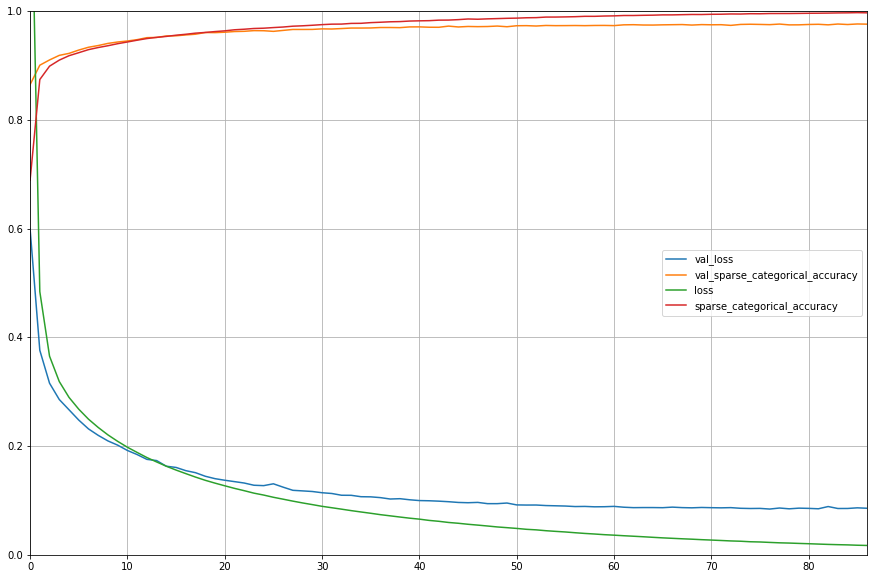

In [124]:
# Plot learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()